In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

(25351, 2, 128, 128)


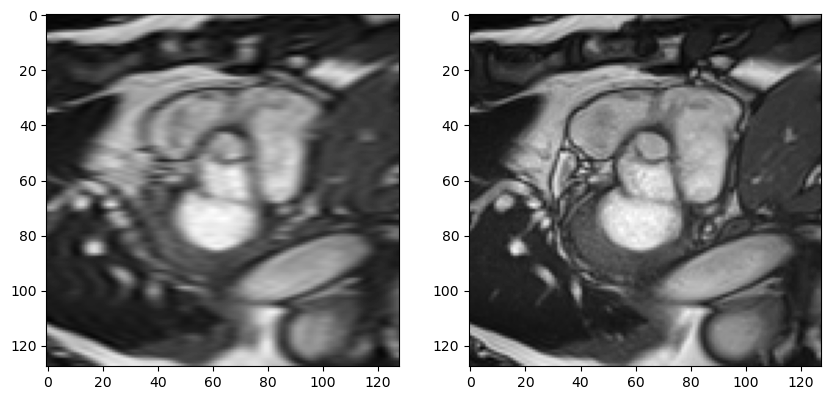

In [3]:
file = np.load('/data/liaohx/DDIM4CineSR/training_dataset/training_data_pairs.npy')
print(file.shape)
sample = file[0]
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sample[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(sample[1], cmap='gray')

In [4]:
import matplotlib.pyplot as plt
import skimage.io as io
from PIL import Image
import numpy as np
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

class Cine(Dataset):
    def __init__(self, path, transform=None):
        super(Cine, self).__init__()
        self.file_path = path  # 传入图像所在的文件夹路径
        self.file = np.load(path)
        self.transform = transform

    def __getitem__(self, index):
        image = self.file[index] 
        
        if self.transform:
            image = self.transform(image)
            image = image.permute(1,2,0)
            source, target = torch.chunk(image, chunks=2, dim=0)
        return target, source

    def __len__(self):
        return self.file.shape[0]

In [9]:
import torch.utils.data as data
my_path = '/data/liaohx/DDIM4CineSR/training_dataset/training_data_pairs.npy'
dataset = Cine(
            path=my_path,
            transform=transforms.ToTensor(),
        )
train_loader = data.DataLoader(dataset=dataset, batch_size=1, shuffle=True, num_workers=0)

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


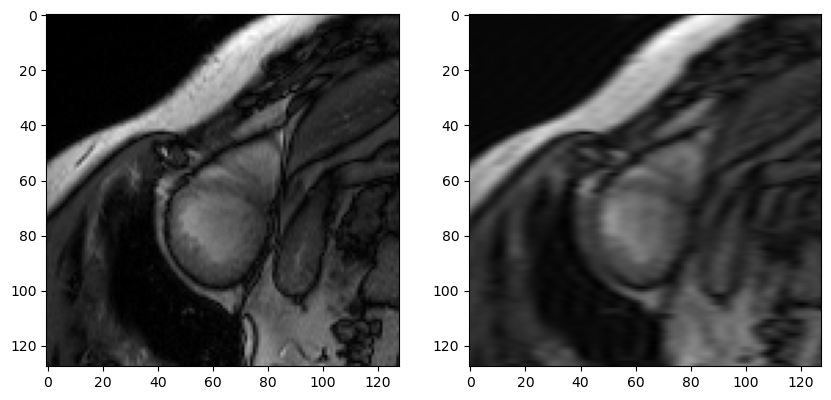

In [10]:
for i, (target, source) in enumerate(train_loader):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(target[0].squeeze(), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(source[0].squeeze(), cmap='gray')
    print(target.shape)
    print(source.shape)
    break